In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# Part 1 - Centrality Metrics


In [3]:
# Load the Networks
G1 = nx.read_edgelist('./US_airports.txt', nodetype=int,data=(('weight',float),))
G2 = nx.read_edgelist('./yeast.txt', nodetype=int,data=(('weight',float),))

In [ ]:
"""
Please use the following order of metrics in the rows and columns of the heatmaps
    1. Eigen-vector Centrality
    2. Katz Centrality (make sure the parameters lead to converged result)
    3. Pagerank Centrality (make sure that the parameters lead to converged result)
    4. Closeness Centrality (consider both networks as unweighted for this metric)
    5. Harmonic Centrality (consider both networks as unweighted for this metric)
    6. Shortest-paths Betweenness Centrality (consider both networks as unweighted for this metric)

"""


In [ ]:
# Compute and print the top-10 nodes according to the centrality metrics.

In [4]:
def get_top_10_nodes(G, centrality_func, n=10, *args, **kwargs):
    centrality_dict = centrality_func(G, *args, **kwargs)
    top_n = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    nodes = [x[0] for x in top_n]
    centrality_scores = [x[1] for x in top_n]
    return nodes, centrality_scores

In [6]:
metrics = ["Eigen-vector", "Katz", "Pagerank", "Closeness", "Harmonic", "Betweenness"]
functions = [
    (nx.eigenvector_centrality, {"weight":"weight"}),
    (nx.katz_centrality, {"beta":1}),
    (nx.pagerank, {"alpha": 0.85}),
    (nx.closeness_centrality, {}),
    (nx.harmonic_centrality, {}),
    (nx.betweenness_centrality, {})
]

for m, f in zip(metrics, functions):
    print(m, f)

Eigen-vector (<function eigenvector_centrality at 0x7f96cc47f430>, {'weight': 'weight'})
Katz (<function katz_centrality at 0x7f96cc488280>, {'beta': 1})
Pagerank (<function pagerank at 0x7f96cc4f9a60>, {'alpha': 0.85})
Closeness (<function closeness_centrality at 0x7f96cc46b430>, {})
Harmonic (<function harmonic_centrality at 0x7f96cc47fee0>, {})
Betweenness (<function betweenness_centrality at 0x7f96cc463700>, {})


In [11]:
metrics = ["Eigen-vector", "Katz", "Pagerank", "Closeness", "Harmonic", "Betweenness"]
functions = [
    (nx.eigenvector_centrality, {"weight":"weight"}),
    (nx.katz_centrality, {"beta":1}),
    (nx.pagerank, {"alpha": 0.85}),
    (nx.closeness_centrality, {}),
    (nx.harmonic_centrality, {}),
    (nx.betweenness_centrality, {})
]

def get_top_10_per_centrality(G):
    result = {}
    for m, (func, kwargs) in zip(metrics, functions):
        if m == "Katz":
            max_alpha = abs(1/max(nx.adjacency_spectrum(G)))
            kwargs["alpha"] = max_alpha*0.9
        nodes, centrality_scores = get_top_10_nodes(G, centrality_func=func, **kwargs)
        result[m] = set(nodes)
    return result

In [12]:
def get_heatmap_matrix(G):
    centrality_dictionaries = get_top_10_per_centrality(G)
    heatmap_matrix = np.zeros((len(metrics), len(metrics)))
    for i, m1 in enumerate(metrics):
        for j, m2 in enumerate(metrics):
            intersection = len(centrality_dictionaries[m1].intersection(centrality_dictionaries[m2]))
            union = len(centrality_dictionaries[m1].union(centrality_dictionaries[m2]))
            heatmap_matrix[i, j] = intersection/union
    return heatmap_matrix, centrality_dictionaries

def plot_heatmap(matrix):
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(matrix, annot=True, xticklabels=metrics, yticklabels=metrics, ax=ax)

In [13]:
hm_g1, top_10_nodes_g1 = get_heatmap_matrix(G1)
top_10_nodes_g1

{'Eigen-vector': {114, 389, 391, 711, 875, 877, 982, 1200, 1255, 1437},
 'Katz': {114, 389, 500, 709, 711, 766, 877, 1016, 1068, 1200},
 'Pagerank': {88, 114, 389, 391, 711, 766, 877, 1200, 1433, 1437},
 'Closeness': {114, 389, 500, 709, 711, 766, 877, 982, 1068, 1200},
 'Harmonic': {114, 389, 500, 709, 711, 766, 877, 982, 1068, 1200},
 'Betweenness': {88, 114, 389, 505, 685, 766, 877, 1016, 1068, 1433}}

In [14]:
hm_g2, top_10_nodes_g2 = get_heatmap_matrix(G2)
top_10_nodes_g2

{'Eigen-vector': {64, 100, 143, 271, 364, 549, 556, 578, 590, 654},
 'Katz': {64, 209, 360, 361, 549, 556, 578, 590, 617, 625},
 'Pagerank': {209, 332, 360, 361, 371, 556, 578, 617, 625, 684},
 'Closeness': {57, 64, 197, 209, 355, 456, 556, 578, 609, 617},
 'Harmonic': {57, 64, 197, 209, 355, 556, 561, 578, 609, 617},
 'Betweenness': {119, 209, 332, 355, 371, 556, 609, 617, 625, 684}}

In [ ]:
# Compare and contrast the ranking of the top-10 nodes obtained from the different centrality metrics using Jaccard Similarity Index heatmaps.

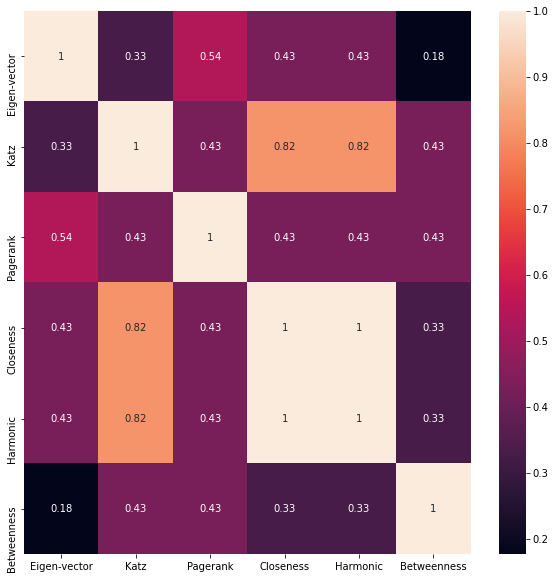

In [15]:
plot_heatmap(hm_g1)

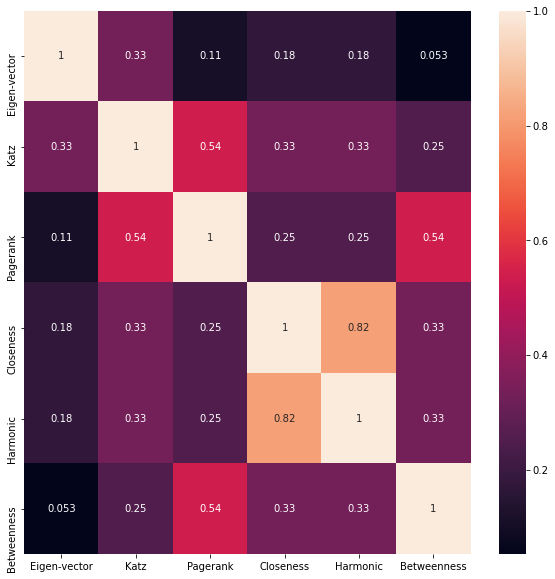

In [16]:
plot_heatmap(hm_g2)